In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/pradeep/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
img = plt.imread('Images/tulip.jpg')

In [3]:
def normalise(img):
    img = img / 255
    return img

normalised_image = normalise(img)

In [4]:
def transform(image):
    m , n , p = image.shape
    
    for i in range(m):
        for j in range(n):
            for k in range(p):
                if image[i][j][k] > 0.04045:
                    image[i][j][k] = ((image[i][j][k] + 0.055) / 1.055) ** 2.4
                else:
                    image[i][j][k] = image[i][j][k] / 12.92
                image[i][j][k] = image[i][j][k] * 100
                
    return image

transformed_image = transform(normalised_image)

In [5]:
def linear_transform(image):
    m , n , p = image.shape
    new_image = np.zeros((m,n,p))
    X = 0.4124564 * image[:,:,0] + 0.3575761 * image[:,:,1] + 0.1804375 * image[:,:,2]
    Y = 0.2126729 * image[:,:,0] + 0.7151522 * image[:,:,1] + 0.0721750 * image[:,:,2]
    Z = 0.0193339 * image[:,:,0] + 0.1191920 * image[:,:,1] + 0.9503041 * image[:,:,2]
    
    X = X / 95.047
    Y = Y / 100.000
    Z = Z / 108.883
    
    X = np.where(X > 0.008856, X ** (1/3), 7.787 * X + 16/116)
    Y = np.where(Y > 0.008856, Y ** (1/3), 7.787 * Y + 16/116)
    Z = np.where(Z > 0.008856, Z ** (1/3), 7.787 * Z + 16/116)
    
    L = (116 * Y) - 16
    a = 500 * (X - Y)
    b = 200 * (Y - Z)
    
    new_image[:,:,0] = L
    new_image[:,:,1] = a
    new_image[:,:,2] = b
    
    return new_image

linear_transformed_image = linear_transform(transformed_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


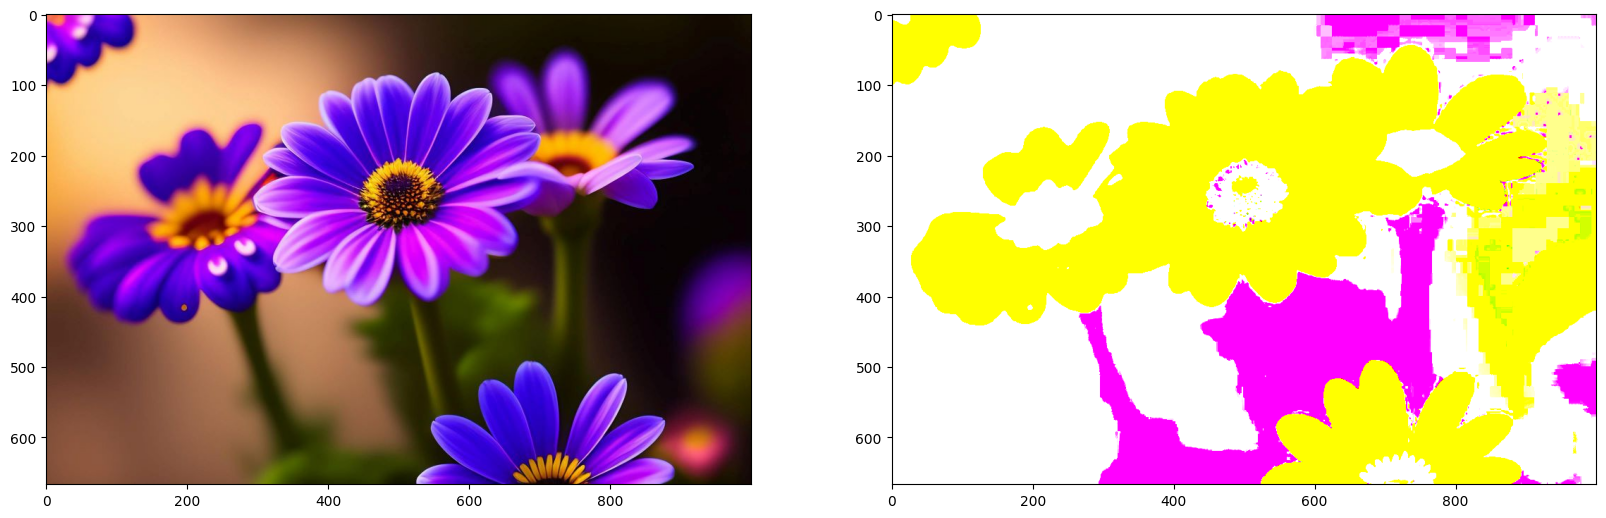

In [6]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(linear_transformed_image)